##**PREPARING FOR WORK WITH NECESSARY TOOLS**

In [1]:
!pip uninstall tensorflow-gpu
!pip uninstall numpy
!pip uninstall tensorflow

Found existing installation: numpy 1.19.5
Uninstalling numpy-1.19.5:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.7
    /usr/local/lib/python3.7/dist-packages/numpy-1.19.5.dist-info/*
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libgfortran-2e0d59d6.so.5.0.0
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libopenblasp-r0-09e95953.3.13.so
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libquadmath-2d0c479f.so.0.0.0
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libz-eb09ad1d.so.1.2.3
    /usr/local/lib/python3.7/dist-packages/numpy/*
Proceed (y/n)? y
  Successfully uninstalled numpy-1.19.5
Found existing installation: tensorflow 2.2.0
Uninstalling tensorflow-2.2.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
 

In [2]:
# !nvidia-smi
# !pip install tensorflow-gpu

!pip install --upgrade grpcio
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# importing inportant libraries
import os
import math
import datetime

!pip install tqdm
from tqdm import tqdm

import pandas as pd

!pip install numpy==1.19.0
import numpy as np


!pip install tensorflow==2.2.0
# !pip install -U tensorflow-text

import tensorflow as tf
from tensorflow import keras
# import tensorflow_hub as hub
# import tensorflow_text as text
# from tensorflow.python.keras.engine.input_spec import InputSpec
# from tensorflow.keras.layers import InputSpec

!pip install bert-for-tf2
import bert
from bert import BertModelLayer
from bert.loader import StockBertConfig, map_stock_config_to_params, load_stock_weights
from bert.tokenization.bert_tokenization import FullTokenizer

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import rc

from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.6 MB 9.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.7 requires tensorflow>=2.0.0, which is not installed.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow-2.2.0-cp37-cp37m-manylinux2010_x86_64.whl (516.2 MB)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##**CLEANING AND PREPARING DATA**

In [4]:
wine = pd.read_csv('/content/winemag-data-130k-v2.csv')
wine.head()

Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe   
1                  NaN                NaN          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore                NaN  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine       Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine   Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [6]:
wine.shape

(129971, 14)

In [7]:
wine.head(10)

Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   
5           5     Spain  Blackberry and raspberry aromas show a typical...   
6           6     Italy  Here's a bright, informal red that opens with ...   
7           7    France  This dry and restrained wine offers spice in p...   
8           8   Germany  Savory dried thyme notes accent sunnier flavor...   
9           9    France  This has great depth of flavor with its fresh ...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   
5                        Ars In Vitro      87   15.0     Northern Spain   
6                             Belsito      87   16.0  Sicily & Sardinia   
7                                 NaN      87   24.0             Alsace   
8                               Shine      87   12.0        Rheinhessen   
9                         Les Natures      87   27.0             Alsace   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe   
1                  NaN                NaN          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore                NaN  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   
5              Navarra                NaN   Michael Schachner   
6             Vittoria                NaN       Kerin O’Keefe   
7               Alsace                NaN          Roger Voss   
8                  NaN                NaN  Anna Lee C. Iijima   
9               Alsace                NaN          Roger Voss   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine       Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine   Sweet Cheeks 2012 Vintner's Reserve Wild Child...   
5           @wineschach  Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...   
6          @kerinokeefe   Terre di Giurfo 2013 Belsito Frappato (Vittoria)   
7            @vossroger              Trimbach 2012 Gewurztraminer (Alsace)   
8                   NaN  Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...   
9            @vossroger  Jean-Baptiste Adam 2012 Les Natures Pinot Gris...   

              variety               winery  
0         White Blend              Nicosia  
1      Portuguese Red  Quinta dos Avidagos  
2          Pinot Gris            Rainstorm  
3            Riesling           St. Julian  
4          Pinot Noir         Sweet Cheeks  
5  Tempranillo-Merlot               Tandem  
6            Frappato      Terre di Giurfo  
7      Gewürztraminer             Trimbach  
8      Gewürztraminer          Heinz Eifel  
9          Pinot Gris   Jean-Baptiste Adam

In [8]:
wine.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [9]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [10]:
wine['designation'].duplicated(keep=False)

0         False
1          True
2          True
3          True
4         False
          ...  
129966     True
129967     True
129968     True
129969     True
129970    False
Name: designation, Length: 129971, dtype: bool

In [11]:
wine.duplicated(subset=['designation'])

0         False
1         False
2         False
3         False
4         False
          ...  
129966     True
129967     True
129968     True
129969     True
129970    False
Length: 129971, dtype: bool

In [12]:
wine.isna().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [13]:
wine.drop(columns = 'region_2', inplace=True)
wine.isna().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [14]:
wine.drop(columns = 'taster_name', inplace=True)
wine.drop(columns = 'taster_twitter_handle', inplace=True)
wine.isna().sum()

Unnamed: 0         0
country           63
description        0
designation    37465
points             0
price           8996
province          63
region_1       21247
title              0
variety            1
winery             0
dtype: int64

In [15]:
wine.shape

(129971, 11)

In [16]:
wine.sort_values(by=['country'], ascending=True).head(20)

Unnamed: 0    country  \
90901        90901  Argentina   
122372      122372  Argentina   
122374      122374  Argentina   
4814          4814  Argentina   
4806          4806  Argentina   
122392      122392  Argentina   
122395      122395  Argentina   
122396      122396  Argentina   
122370      122370  Argentina   
4796          4796  Argentina   
86875        86875  Argentina   
86865        86865  Argentina   
122403      122403  Argentina   
86862        86862  Argentina   
122408      122408  Argentina   
4784          4784  Argentina   
86861        86861  Argentina   
122398      122398  Argentina   
28462        28462  Argentina   
28461        28461  Argentina   

                                              description  \
90901   Odd aromas of bath soap and tropical fruits ar...   
122372  Malty, earthy aromas of cassis and prune are t...   
122374  This SB delivers citrus peel, grass and other ...   
4814    Opens with aromas of tomato leaf, fresh salsa ...   
4806    A heavy, dark and loud Malbec with bullish flo...   
122392  Earthy, murky, raw aromas of generic berry fru...   
122395  Cool, dark-plum aromas are mildly herbal. This...   
122396  This pruny smelling Malbec, Cabernet and Petit...   
122370  Rubbery aromas of asphalt vie with berry fruit...   
4796    Generic on the nose, with undistinguished arom...   
86875   Grapy candied berry aromas mix with loud oak t...   
86865   This wine has showed no consistency over the y...   
122403  Warm, earthy plum and tomato aromas turn horse...   
86862   Soupy, saucy aromas are akin to tomato sauce. ...   
122408  Aromas of prune and cocoa powder accurately po...   
4784    Licorice, cardamom, blueberry and cassis aroma...   
86861   Big, raisiny and obtuse up front, this fully e...   
122398  Pointy cherry aromas initially suggest nail po...   
28462   Smells a bit acrid, with aromas of peach pit a...   
28461   Gaseous and rubbery, with leafy compost aromas...   

                                        designation  points  price  \
90901                    Valle Las Acequias Clase A      81    9.0   
122372                                          NaN      86   15.0   
122374                                  Ciclos Fume      86   28.0   
4814                                        Reserva      85   15.0   
4806                                            NaN      85   20.0   
122392                                     Portillo      84   10.0   
122395                                      Reserve      84   16.0   
122396                         Estate Black Edition      84   15.0   
122370                                       Felino      86   20.0   
4796                                 Rosé of Malbec      85   13.0   
86875                                           NaN      83   14.0   
86865                                     Colección      84   19.0   
122403                                          NaN      84   12.0   
86862           Viña Amalia Reserva Single Vineyard      84   19.0   
122408  Sustainably Farmed Estate Grown and Bottled      84   12.0   
4784                                      Red Blend      90   95.0   
86861                                       Lote 44      84   12.0   
122398                                          NaN      84   16.0   
28462                     Alta Chardonnay-Torrontes      82   10.0   
28461                                           NaN      82   10.0   

                province      region_1  \
90901   Mendoza Province       Mendoza   
122372  Mendoza Province       Mendoza   
122374             Other      Cafayate   
4814               Other       Neuquén   
4806    Mendoza Province    Uco Valley   
122392  Mendoza Province  Valle de Uco   
122395  Mendoza Province       Mendoza   
122396  Mendoza Province       Mendoza   
122370  Mendoza Province       Mendoza   
4796    Mendoza Province       Mendoza   
86875   Mendoza Province       Mendoza   
86865   Mendoza Province       Mendoza   
122403  Mendoza

In [17]:
wine.drop(columns = 'designation', inplace=True)
wine.isna().sum()

Unnamed: 0         0
country           63
description        0
points             0
price           8996
province          63
region_1       21247
title              0
variety            1
winery             0
dtype: int64

In [18]:
wine.dropna(subset = ['price'], inplace=True)
wine.dropna(subset = ['country'], inplace=True)
wine.dropna(subset = ['variety'], inplace=True)
wine.isna().sum()

Unnamed: 0         0
country            0
description        0
points             0
price              0
province           0
region_1       19515
title              0
variety            0
winery             0
dtype: int64

In [19]:
wine.count()

Unnamed: 0     120915
country        120915
description    120915
points         120915
price          120915
province       120915
region_1       101400
title          120915
variety        120915
winery         120915
dtype: int64

In [20]:
wine.head(1)

Unnamed: 0   country                                        description  \
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   

   points  price province region_1  \
1      87   15.0    Douro      NaN   

                                           title         variety  \
1  Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   

                winery  
1  Quinta dos Avidagos

In [21]:
wine.rename(columns = {'Unnamed: 0':'index','region_1':'region'}, inplace=True)
wine.head(1)

index   country                                        description  points  \
1      1  Portugal  This is ripe and fruity, a wine that is smooth...      87   

   price province region                                          title  \
1   15.0    Douro    NaN  Quinta dos Avidagos 2011 Avidagos Red (Douro)   

          variety               winery  
1  Portuguese Red  Quinta dos Avidagos

In [22]:
wine_df = wine[["index","country","price","points","title","variety","winery","region","province","description"]]
wine_df.head(1)

index   country  price  points  \
1      1  Portugal   15.0      87   

                                           title         variety  \
1  Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   

                winery region province  \
1  Quinta dos Avidagos    NaN    Douro   

                                         description  
1  This is ripe and fruity, a wine that is smooth...

In [23]:
wine_df.describe(include='all').T

count  unique  \
index        120915.0     NaN   
country        120915      42   
price        120915.0     NaN   
points       120915.0     NaN   
title          120915  110582   
variety        120915     691   
winery         120915   15843   
region         101400    1204   
province       120915     422   
description    120915  111511   

                                                           top   freq  \
index                                                      NaN    NaN   
country                                                     US  54265   
price                                                      NaN    NaN   
points                                                     NaN    NaN   
title        Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...     11   
variety                                             Pinot Noir  12785   
winery                                              Testarossa    217   
region                                             Napa Valley   4475   
province                                            California  36104   
description  Ripe plum, game, truffle, leather and menthol ...      3   

                     mean           std   min      25%      50%      75%  \
index        65043.605541  37511.733783   1.0  32571.5  65141.0  97501.5   
country               NaN           NaN   NaN      NaN      NaN      NaN   
price           35.368796     41.031188   4.0     17.0     25.0     42.0   
points          88.421726      3.044954  80.0     86.0     88.0     91.0   
title                 NaN           NaN   NaN      NaN      NaN      NaN   
variety               NaN           NaN   NaN      NaN      NaN      NaN   
winery                NaN           NaN   NaN      NaN      NaN      NaN   
region                NaN           NaN   NaN      NaN      NaN      NaN   
province              NaN           NaN   NaN      NaN      NaN      NaN   
description           NaN           NaN   NaN      NaN      NaN      NaN   

                  max  
index        129970.0  
country           NaN  
price          3300.0  
points          100.0  
title             NaN  
variety           NaN  
winery            NaN  
region            NaN  
province          NaN  
description       NaN

In [24]:
wine_df['points'].corr(wine_df['price'])

0.4161971360153306

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


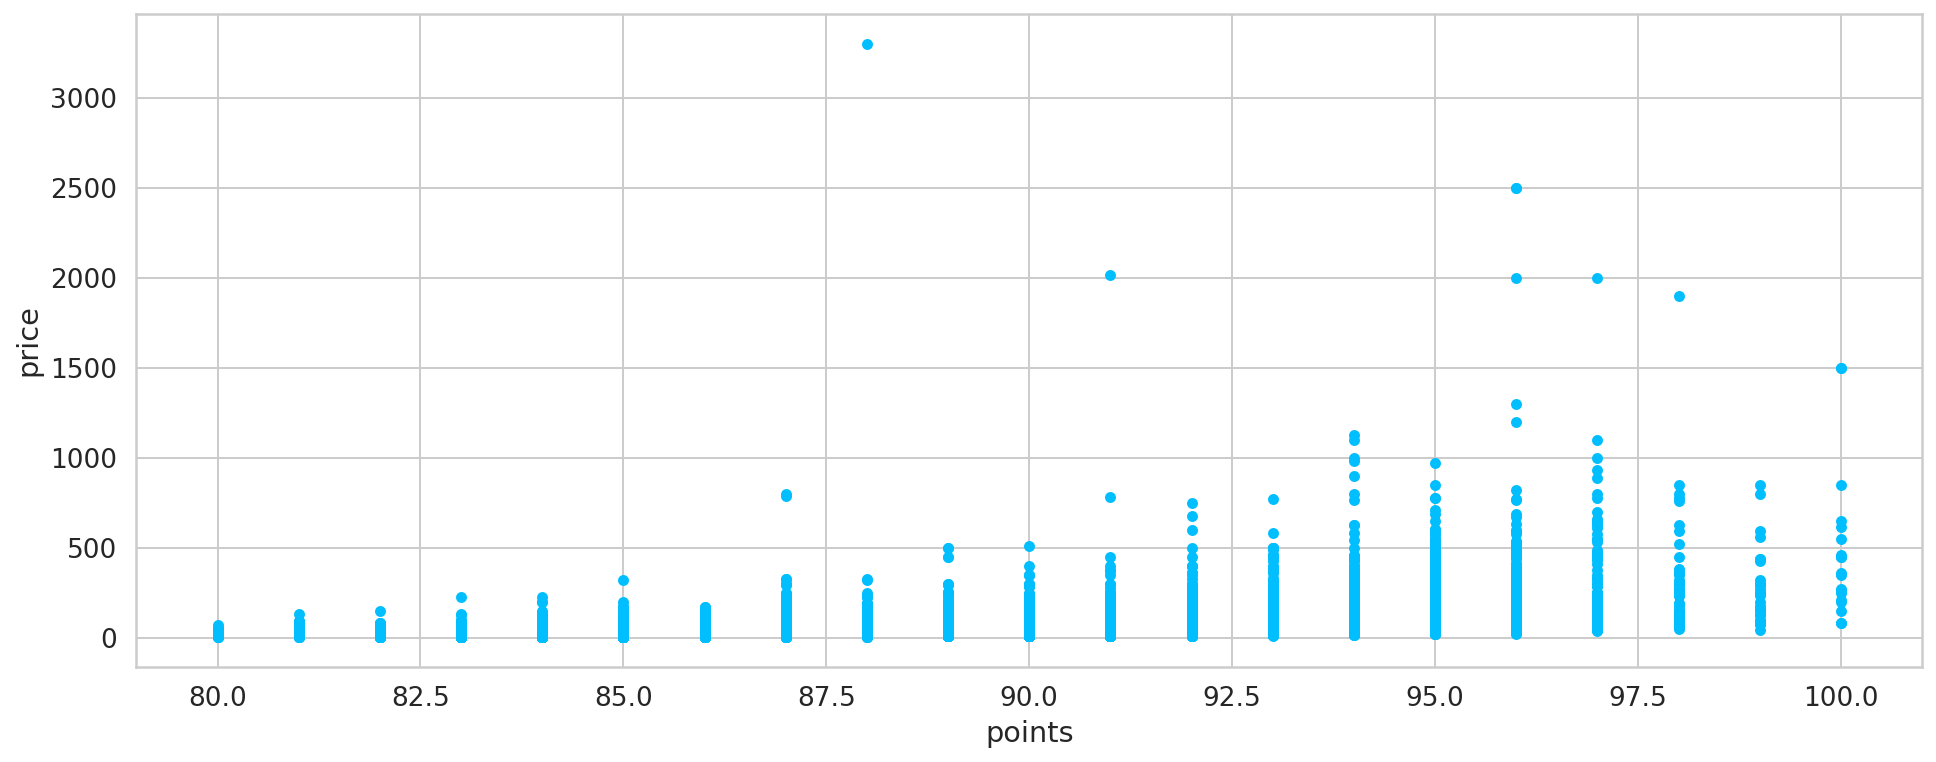

In [25]:
wine_df.plot.scatter(x='points', y='price', figsize=(16, 6));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


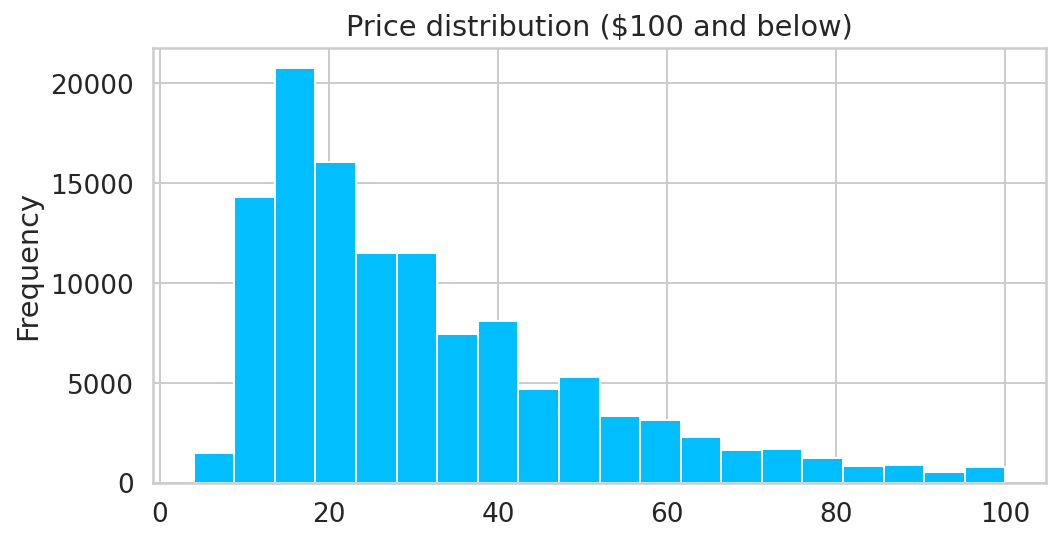

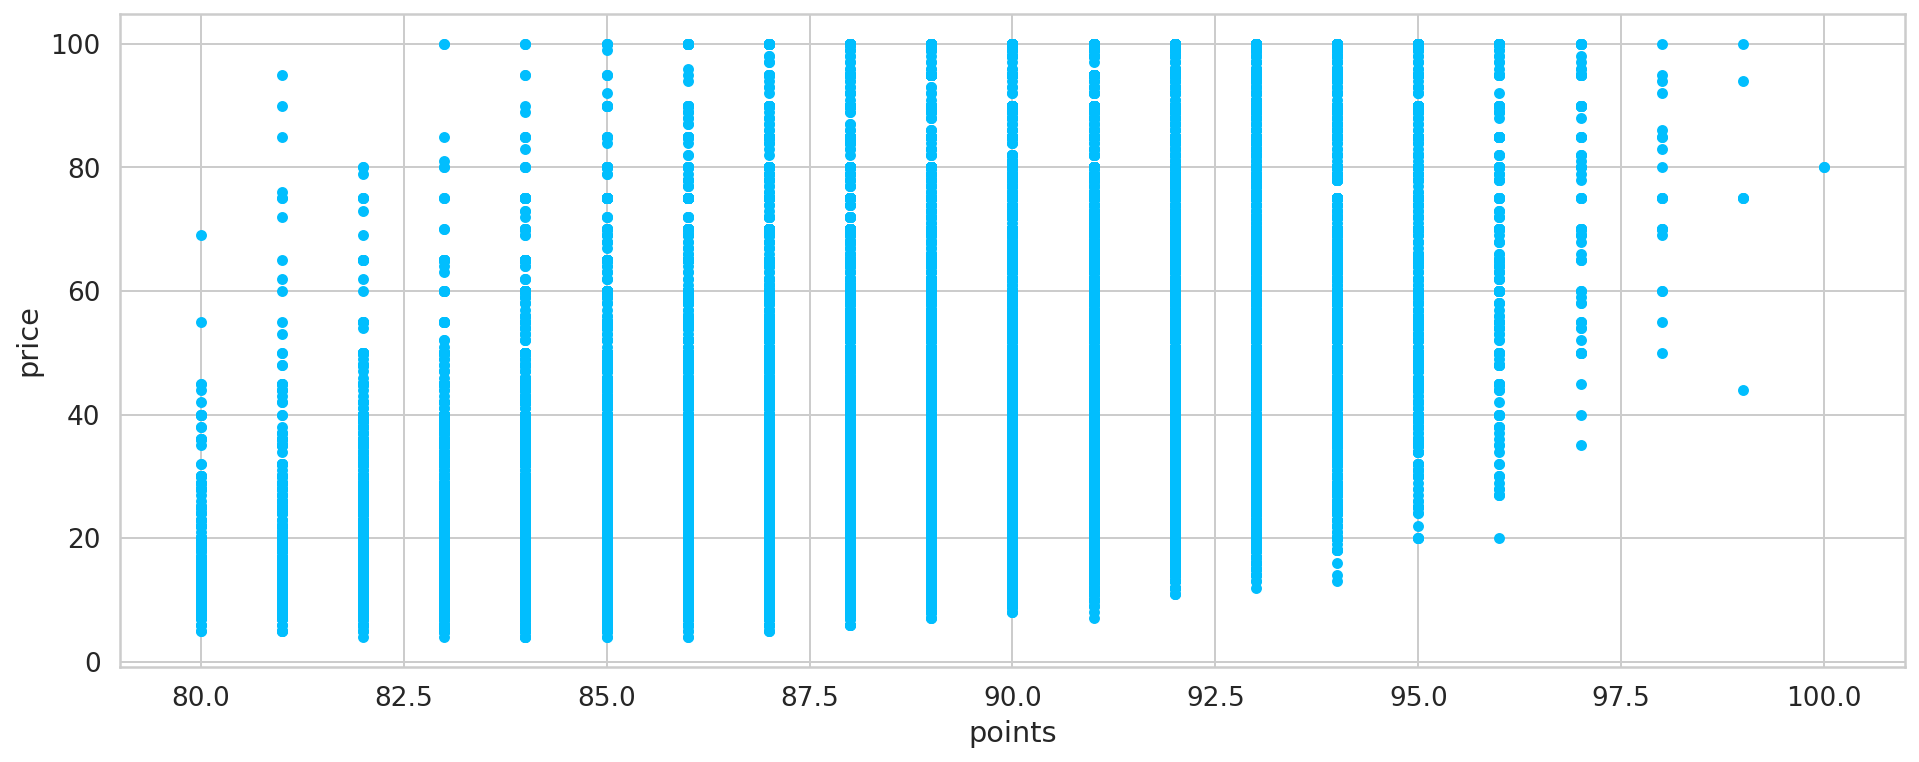

In [26]:
wine_df_final = wine_df[wine_df['price'] <= 100]
wine_df_final['price'].plot.hist(bins=20, figsize=(8, 4), title='Price distribution ($100 and below)');
wine_df_final.plot.scatter(x='points', y='price', figsize=(16, 6));

In [27]:
wine_df_final.count()   # you can see how much noise we got rid of

index          117549
country        117549
price          117549
points         117549
title          117549
variety        117549
winery         117549
region          98310
province       117549
description    117549
dtype: int64

In [28]:
wine_df_final['points'].corr(wine_df_final['price'])  # you can see how much noise we got rid of

0.5481421728264431

In [29]:
wine_df_final.head(1)

index   country  price  points  \
1      1  Portugal   15.0      87   

                                           title         variety  \
1  Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   

                winery region province  \
1  Quinta dos Avidagos    NaN    Douro   

                                         description  
1  This is ripe and fruity, a wine that is smooth...

### GROUPING DATA


In [30]:
#Best wine in each country
wine_df_final.groupby('country')['points'].nlargest(2)
df1 = wine_df_final.groupby('country')
df2= df1.apply(lambda x: x.sort_values(["points"], ascending=False))
df3=df2.reset_index(drop=True)
df3.groupby('country').head(1)[['country', 'title', 'variety', 'winery', 'province', 'points', 'price']]

country  \
0                    Argentina   
3675                   Armenia   
3677                 Australia   
5878                   Austria   
8656    Bosnia and Herzegovina   
8658                    Brazil   
8705                  Bulgaria   
8846                    Canada   
9099                     Chile   
13479                    China   
13480                  Croatia   
13551                   Cyprus   
13562           Czech Republic   
13574                  England   
13643                   France   
30417                  Georgia   
30501                  Germany   
32510                   Greece   
32971                  Hungary   
33110                    India   
33119                   Israel   
33606                    Italy   
49844                  Lebanon   
49879               Luxembourg   
49885                Macedonia   
49897                   Mexico   
49966                  Moldova   
50025                  Morocco   
50053              New Zealand   
51421                     Peru   
51437                 Portugal   
56238                  Romania   
56357                   Serbia   
56369                 Slovakia   
56370                 Slovenia   
56450             South Africa   
57734                    Spain   
64114              Switzerland   
64118                   Turkey   
64207                       US   
117428                 Ukraine   
117442                 Uruguay   

                                                    title  \
0       Riglos 2009 Gran Corte Las Divas Vineyard Red ...   
3675          Van Ardi 2015 Estate Bottled Rosé (Armenia)   
3677    R.L. Buller & Son NV Calliope Rare Tokay (Ruth...   
5878    Kracher 2013 Grande Cuvée Trockenbeerenauslese...   
8656                  Winery Čitluk 2011 Blatina (Mostar)   
8658    Cave Geisse 2013 Brut Nature Sparkling (Pinto ...   
8705        Bessa 2011 Grande Cuvée Red (Thracian Valley)   
8846    Laughing Stock 2014 Portfolio Red (Okanagan Va...   
9099    Lapostolle 2008 Clos Apalta Red (Colchagua Val...   
13479   Chateau Changyu-Castel 2009 Noble Dragon Red (...   
13480                Bibich NV Ambra Red (North Dalmatia)   
13551                   Tsiakkas 2014 Xynisteri (Lemesos)   
13562       Stapleton & Springer 2007 Roucí Red (Moravia)   
13574   Sugrue Pierre Ltd. 2010 The Trouble with Dream...   
13643                        Château Climens 2014  Barsac   
30417   Alaverdi Monastery Cellar 2010 Qvevri Traditio...   
30501   Dr. Heidemanns-Bergweiler 2009 Bernkasteler Jo...   
32510               Dionysos 2014 Moschofilero (Mantinia)   
32971   Royal Tokaji 2013 6 Puttonyos Aszú Gold Label ...   
33110           Sula 2011 Dindori Reserve Shiraz (Nashik)   
33119   Recanati 2011 Reserve David Vineyard Cabernet ...   
33606     Comm. G. B. Burlotto 2013 Monvigliero  (Barolo)   
49844                         Ixsir 2011 El Red (Lebanon)   
49879   Domaines Vinsmoselle 2014 Bech-Kleinmacher Nau...   
49885                  Stobi 2011 Veritas Vranec (Tikves)   
49897   Viñas de Garza 2007 Amado IV Red (Valle de Gua...   
49966            Purcari 2013 Freedom Blend Red (Moldova)   
50025            Ouled Thaleb 2012 Médaillon Red (Zenata)   
50053   Squawking Magpie 2014 SQM Gimblett Gravels Cab...   
51421   Tacama 2008 Sinfonía Tannat-Malbec-Petit Verdo...   
51437                Quinta do Vale Meão 2012 Red (Douro)   
56238   Cramele Recas 2013 Conocul Ambrozy Sauvignon B...   
56357                    Budimir 2009 Sub Rosa Red (Župa)   
56369                  Château Bela 2008 Riesling (Muzla)   
56370                      Movia 2007 Veliko White (Brda)   
56450   Klein Constantia 2007 Vin de Constance Muscat ...   
57734   Bodegas Gutiérrez de la Vega 1999 Casta Diva F...   
64114   Robert Gilliard 2012 Dôle des Monts Pinot Noir...   
64118             Kavaklidere 2010 Pendore Syrah (Aegean)   
64207   Cayuse 2008 Bionic Frog Syrah (Walla Walla Val...   
117428              Koblevo NV Reserve Riesling (Ukraine)  

In [31]:
#We sort countries alphabetically:
wine_argentina = wine_df_final.sort_values(by=['country'], ascending=True)

*Dropujemy wszystko co nie jest Argentyną w df'*ie*

In [32]:
argentina = wine_argentina[wine_argentina.country == 'Argentina']
wine_argentina.shape

(117549, 10)

In [33]:
argentina.shape

(3675, 10)

In [34]:
#Sorting prototype
wine_country = wine_df_final.sort_values(by=['points'], ascending=False)
wine_country_input = input("Name of country: ")
wineByCountry = wine_country[wine_country.country == wine_country_input]
wineByCountry.head(20)

Name of country: Chile


index country  price  points  \
95554    95554   Chile   70.0      95   
73993    73993   Chile   90.0      95   
51388    51388   Chile   92.0      94   
12942    12942   Chile   40.0      94   
37649    37649   Chile   75.0      94   
25398    25398   Chile   50.0      94   
76209    76209   Chile  100.0      94   
97636    97636   Chile  100.0      94   
115961  115961   Chile   90.0      93   
22844    22844   Chile   60.0      93   
87309    87309   Chile   75.0      93   
114727  114727   Chile   85.0      93   
26678    26678   Chile   80.0      93   
24748    24748   Chile   40.0      93   
115577  115577   Chile   90.0      93   
25015    25015   Chile   78.0      93   
25013    25013   Chile   95.0      93   
15131    15131   Chile   75.0      93   
82725    82725   Chile   90.0      93   
80066    80066   Chile   65.0      93   

                                                    title  \
95554   Valdivieso NV Caballo Loco Number Sixteen Red ...   
73993   Lapostolle 2008 Clos Apalta Red (Colchagua Val...   
51388             Emiliana 2006 Gê Red (Colchagua Valley)   
12942   Santa Carolina 2012 VSC Assemblage Red (Cachap...   
37649   Lapostolle 2005 Clos Apalta Red (Colchagua Val...   
25398   François Lurton 2011 Alka Carmenère (Colchagua...   
76209      Santa Carolina 2011 Herencia Carmenère (Peumo)   
97636                     Almaviva 2013 Red (Puente Alto)   
115961         Montes 2012 Folly Syrah (Colchagua Valley)   
22844   Pangea 2011 Apalta Vineyard Syrah (Colchagua V...   
87309   Santa Rita 2007 Casa Real Cabernet Sauvignon (...   
114727  Santa Rita 2013 Casa Real Estate Bottled Caber...   
26678   Lapostolle 2007 Clos Apalta Red (Colchagua Val...   
24748            Polkura 2012 Block g+i Syrah (Marchigue)   
115577            Emiliana 2005 Gê Red (Colchagua Valley)   
25015                    Seña 2006 Red (Aconcagua Valley)   
25013                Montes 2006 Folly Syrah (Santa Cruz)   
15131                  Altaïr 2014 Red (Cachapoal Valley)   
82725          Montes 2012 Alpha M Red (Colchagua Valley)   
80066   Domaines Barons de Rothschild (Lafite) 2010 Le...   

                         variety                                  winery  \
95554                  Red Blend                              Valdivieso   
73993                  Red Blend                              Lapostolle   
51388                  Red Blend                                Emiliana   
12942                  Red Blend                          Santa Carolina   
37649                  Red Blend                              Lapostolle   
25398                  Carmenère                         François Lurton   
76209                  Carmenère                          Santa Carolina   
97636                  Red Blend                                Almaviva   
115961                     Syrah                                  Montes   
22844                      Syrah                                  Pangea   
87309         Cabernet Sauvignon                              Santa Rita   
114727        Cabernet Sauvignon                              Santa Rita   
26678                  Red Blend                              Lapostolle   
24748                      Syrah                                 Polkura   
115577                 Red Blend                                Emiliana   
25015   Bordeaux-style Red Blend                                    Seña   
25013                      Syrah                                  Montes   
15131                  Red Blend                                  Altaïr   
82725                  Red Blend                                  Montes   
80066             Cabernet Blend  Domaines Barons de Rothschild (Lafite)   

       region          province  \
95554     NaN    Central Valley   
73993     NaN  Colchagua Valley   
51388     NaN  Colchagua Valley   
12942     NaN  Cachapoal Valley   
37649     NaN  Colchagua Valley   
25398     NaN  Colchagua Valley   
76209     NaN          

In [35]:
wineByCountry.shape

(4380, 10)

**Prototype_final_version - Sorting by country and by price - Return TOP 5**

In [36]:
wine_df_final.describe(include='all').T

count  unique  \
index        117549.0     NaN   
country        117549      42   
price        117549.0     NaN   
points       117549.0     NaN   
title          117549  107390   
variety        117549     686   
winery         117549   15694   
region          98310    1176   
province       117549     421   
description    117549  108283   

                                                           top   freq  \
index                                                      NaN    NaN   
country                                                     US  53221   
price                                                      NaN    NaN   
points                                                     NaN    NaN   
title        Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...     11   
variety                                             Pinot Noir  12397   
winery                                              Testarossa    217   
region                                    Columbia Valley (WA)   4094   
province                                            California  35153   
description  Ripe plum, game, truffle, leather and menthol ...      3   

                     mean           std   min      25%      50%      75%  \
index        65010.515785  37501.717421   1.0  32538.0  65084.0  97447.0   
country               NaN           NaN   NaN      NaN      NaN      NaN   
price           31.089146     19.206442   4.0     17.0     25.0     40.0   
points          88.295766      2.960545  80.0     86.0     88.0     90.0   
title                 NaN           NaN   NaN      NaN      NaN      NaN   
variety               NaN           NaN   NaN      NaN      NaN      NaN   
winery                NaN           NaN   NaN      NaN      NaN      NaN   
region                NaN           NaN   NaN      NaN      NaN      NaN   
province              NaN           NaN   NaN      NaN      NaN      NaN   
description           NaN           NaN   NaN      NaN      NaN      NaN   

                  max  
index        129970.0  
country           NaN  
price           100.0  
points          100.0  
title             NaN  
variety           NaN  
winery            NaN  
region            NaN  
province          NaN  
description       NaN

In [37]:
#Sorting prototype_version
wine_country = wine_df_final.sort_values(by=['points'], ascending=False)
wine_country_input = input("Name of country: ")
wineByCountry = wine_country[wine_country.country == wine_country_input]
wine_price_input = float(input("Pick your price: "))
wineByPrice = wineByCountry[wineByCountry.price == wine_price_input]
wineByPrice.reset_index(drop=True).head()

Name of country: Chille
Pick your price: 50


Empty DataFrame
Columns: [index, country, price, points, title, variety, winery, region, province, description]
Index: []

In [38]:
#@title
# #funkcja:

# def wine_inputs():
#   wine_country_input = input("Name of country: ")
#   wine_price_input = float(input("Pick your min price: "))
  
#   return wine_country_input, wine_price_input

# def top_5_wines():
#   wine_country_input, wine_price_input = wine_inputs()

#   wine_country = wine_final_final.sort_values(by=['points'], ascending=False)
#   wine_country_final = wine_country[wine_country.country == wine_country_input]
#   wine_price_final = wine_country_final[wine_country_final.price == wine_price_input]
  
#   return wine_price_final.reset_index(drop=True).head()

In [39]:
#@title
# #funkcja 2 prototyp:

# def wine_inputs():
#   wine_country_input = input("Name of country: ")
#   min = int(input("Pick your min price: "))
#   max = int(input("Pick your max price: "))
  
#   for i in range(min,max+1, 1):
#     print(int(i), end=' ')

#   return wine_country_input, i

# def top_5_wines():
#   wine_country_input, i = wine_inputs()

#   wine_country = wine_final_final.sort_values(by=['points'], ascending=False)
#   wine_country_final = wine_country[wine_country.country == wine_country_input]
#   wine_price_final = wine_country_final[wine_country_final.price == i]
  
#   return wine_price_final.reset_index(drop=True).head()
# def best_wines_per_price(wine_final_final, wine_price_input, wine_country_input):    
#   affordable_us_wines_df = wine_final_final[(wine_final_final['price'] <= wine_price_input) & (wine_final_final['country'] == wine_country_input)]
#   top_25_df = affordable_us_wines_df.sort_values(by='points', ascending=False).head(25)
#   return top_25_df[['title', 'variety', 'winery', 'province', 'points', 'price']]

# def top5_wine_by_country(wine_country_input):
#     wine_country = wine_final_final.sort_values(by=['country'], ascending=True)
#     wine_country_input = input("Name of country: ")
#     wine_country_final = wine_country[wine_country.country == wine_country_input]
#     return wine_country_input

# def top_5_country(column, stat):
#   wine_final_final['country']=
#   wine_final_final['points']= 
#   mean_price = 35

#   return wine_final_final

# def best_wines_per_price(df, price_limit, country='US')
#   affordable_us_wines_df = df[(df['price'] <= price_limit) & (df['country'] == country)]
#   top_25_df = affordable_us_wines_df.sort_values(by='points', ascending=False).head(25)
  
#   return top_25_df[['title', 'variety', 'winery', 'province', 'points', 'price']]

!!! Machine Learningowy Sommelier - NLP omahgash

https://colab.research.google.com/drive/1wjSSg2UkPMgFel0_oYP381FPytDvYUgO#scrollTo=b6XfTuNiW2IT

Here is different way which provide to nowhere -> Maybe finish someday ;)

# DATA PREPROCESSING:

In [40]:
# checking the shape of the data
wine_df_final.shape

(117549, 10)

In [41]:
# Checking the head of the data
wine_df_final.head()

index   country  price  points  \
1      1  Portugal   15.0      87   
2      2        US   14.0      87   
3      3        US   13.0      87   
4      4        US   65.0      87   
5      5     Spain   15.0      87   

                                               title             variety  \
1      Quinta dos Avidagos 2011 Avidagos Red (Douro)      Portuguese Red   
2      Rainstorm 2013 Pinot Gris (Willamette Valley)          Pinot Gris   
3  St. Julian 2013 Reserve Late Harvest Riesling ...            Riesling   
4  Sweet Cheeks 2012 Vintner's Reserve Wild Child...          Pinot Noir   
5  Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...  Tempranillo-Merlot   

                winery               region        province  \
1  Quinta dos Avidagos                  NaN           Douro   
2            Rainstorm    Willamette Valley          Oregon   
3           St. Julian  Lake Michigan Shore        Michigan   
4         Sweet Cheeks    Willamette Valley          Oregon   
5               Tandem              Navarra  Northern Spain   

                                         description  
1  This is ripe and fruity, a wine that is smooth...  
2  Tart and snappy, the flavors of lime flesh and...  
3  Pineapple rind, lemon pith and orange blossom ...  
4  Much like the regular bottling from 2012, this...  
5  Blackberry and raspberry aromas show a typical...

In [42]:
# Getting top 7 most described variety
temp_df = wine_df_final.variety.value_counts()
temp_df.head(10)

Pinot Noir                  12397
Chardonnay                  10823
Cabernet Sauvignon           8683
Red Blend                    8253
Bordeaux-style Red Blend     4999
Riesling                     4873
Sauvignon Blanc              4778
Syrah                        4004
Rosé                         3259
Merlot                       3020
Name: variety, dtype: int64

In [43]:
# For this project we are taking top 7 variety only
mask = wine_df_final['variety'].isin(['Pinot Noir', 'Chardonnay', 'Cabernet Sauvignon', 'Red Blend', 'Bordeaux-style Red Blend', 'Riesling', 'Sauvignon Blanc','Syrah','Rosé','Merlot'])
df = wine_df_final[mask]
df.head()

index country  price  points  \
3       3      US   13.0      87   
4       4      US   65.0      87   
10     10      US   19.0      87   
12     12      US   34.0      87   
14     14      US   12.0      87   

                                                title             variety  \
3   St. Julian 2013 Reserve Late Harvest Riesling ...            Riesling   
4   Sweet Cheeks 2012 Vintner's Reserve Wild Child...          Pinot Noir   
10  Kirkland Signature 2011 Mountain Cuvée Caberne...  Cabernet Sauvignon   
12  Louis M. Martini 2012 Cabernet Sauvignon (Alex...  Cabernet Sauvignon   
14           Mirassou 2012 Chardonnay (Central Coast)          Chardonnay   

                winery               region    province  \
3           St. Julian  Lake Michigan Shore    Michigan   
4         Sweet Cheeks    Willamette Valley      Oregon   
10  Kirkland Signature          Napa Valley  California   
12    Louis M. Martini     Alexander Valley  California   
14            Mirassou        Central Coast  California   

                                          description  
3   Pineapple rind, lemon pith and orange blossom ...  
4   Much like the regular bottling from 2012, this...  
10  Soft, supple plum envelopes an oaky structure ...  
12  Slightly reduced, this wine offers a chalky, t...  
14  Building on 150 years and six generations of w...

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


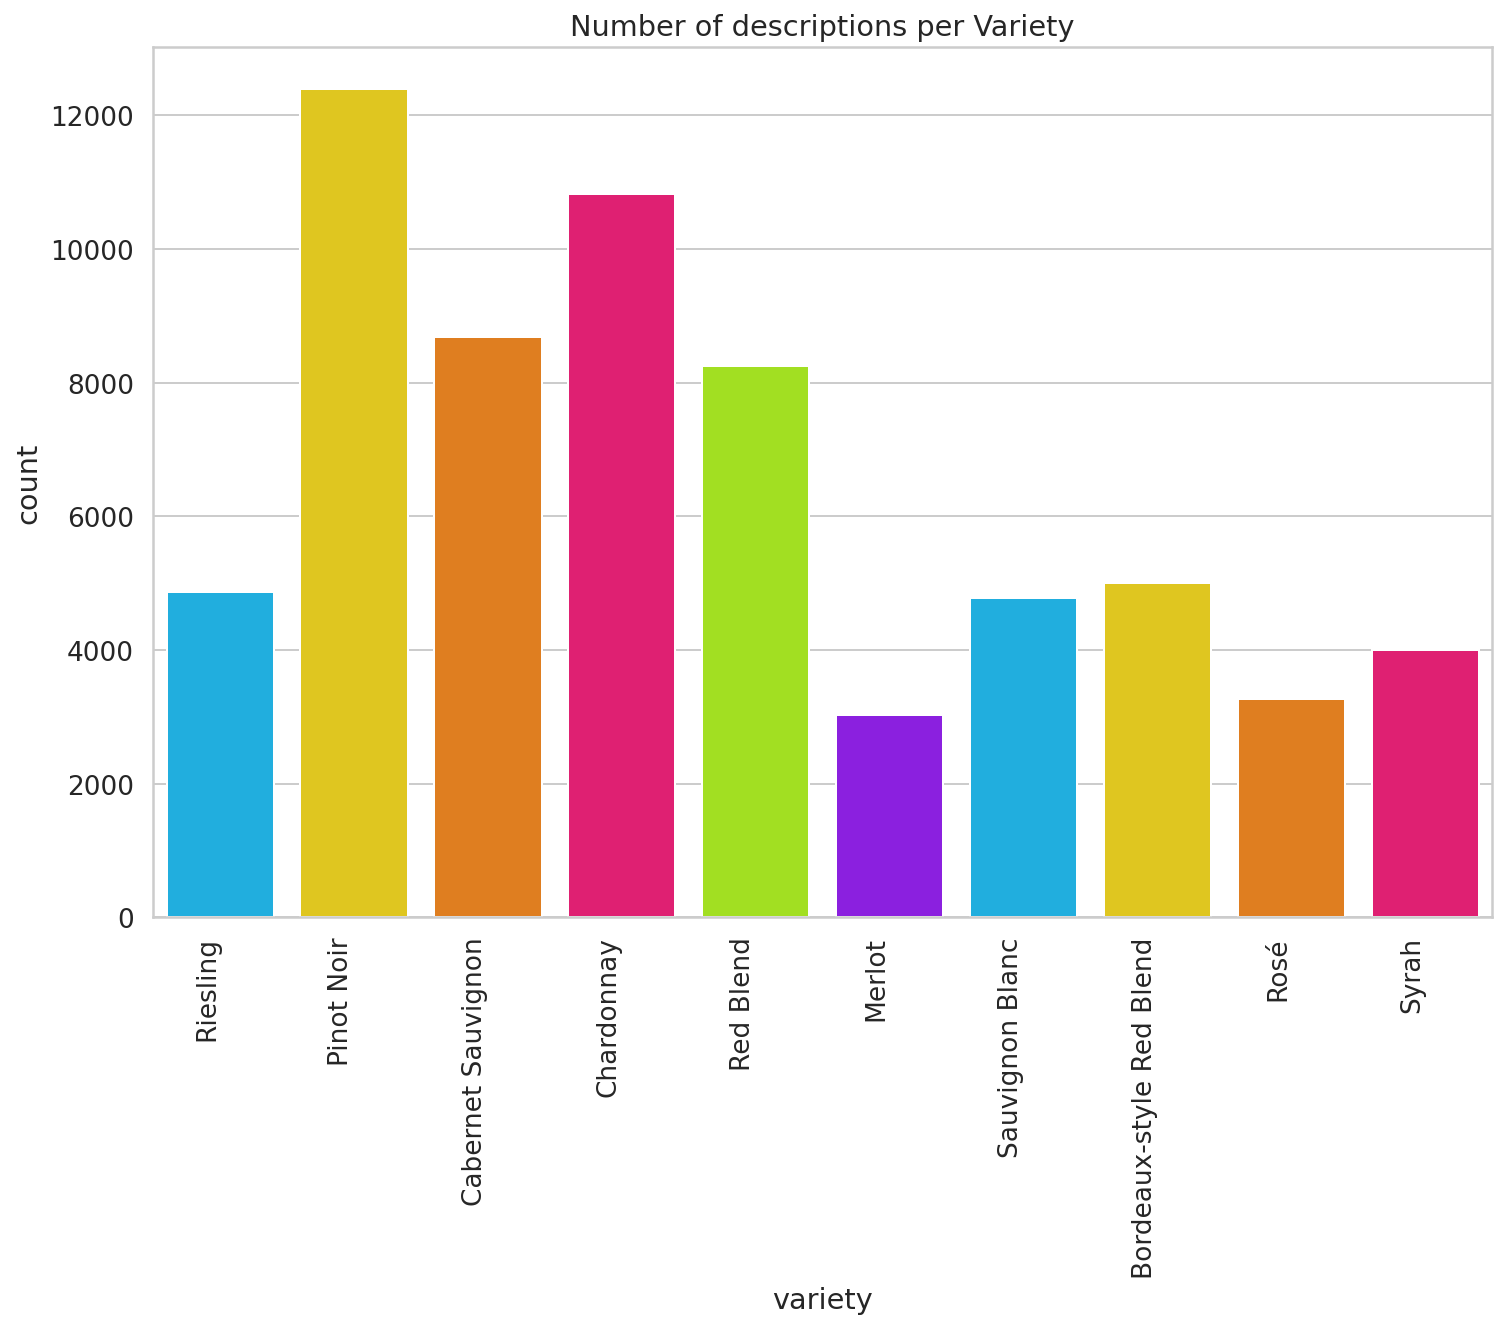

In [44]:
chart = sns.countplot(df.variety, palette=HAPPY_COLORS_PALETTE)
plt.title("Number of descriptions per Variety")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right');

In [45]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.description, df.variety, test_size = 0.2, random_state = 42)

train = { 'text': X_train, 'intent': y_train }
train_df = pd.DataFrame(train)
test = { 'text': X_test, 'intent': y_test }
test_df = pd.DataFrame(test)

train_df.head()

text              intent
9457    A tempting aroma of vanilla and cream leads to...          Chardonnay
46390   The straightforward Cabernet fruit is immersed...  Cabernet Sauvignon
73408   A dark and toasty specimen with a deep-purple ...  Cabernet Sauvignon
100462  Pretty generic-tasting but basically good, a d...              Merlot
109226  This is oily and strained on the nose and fles...     Sauvignon Blanc

In [46]:
train_df.shape

(52071, 2)

In [47]:
df.shape

(65089, 10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


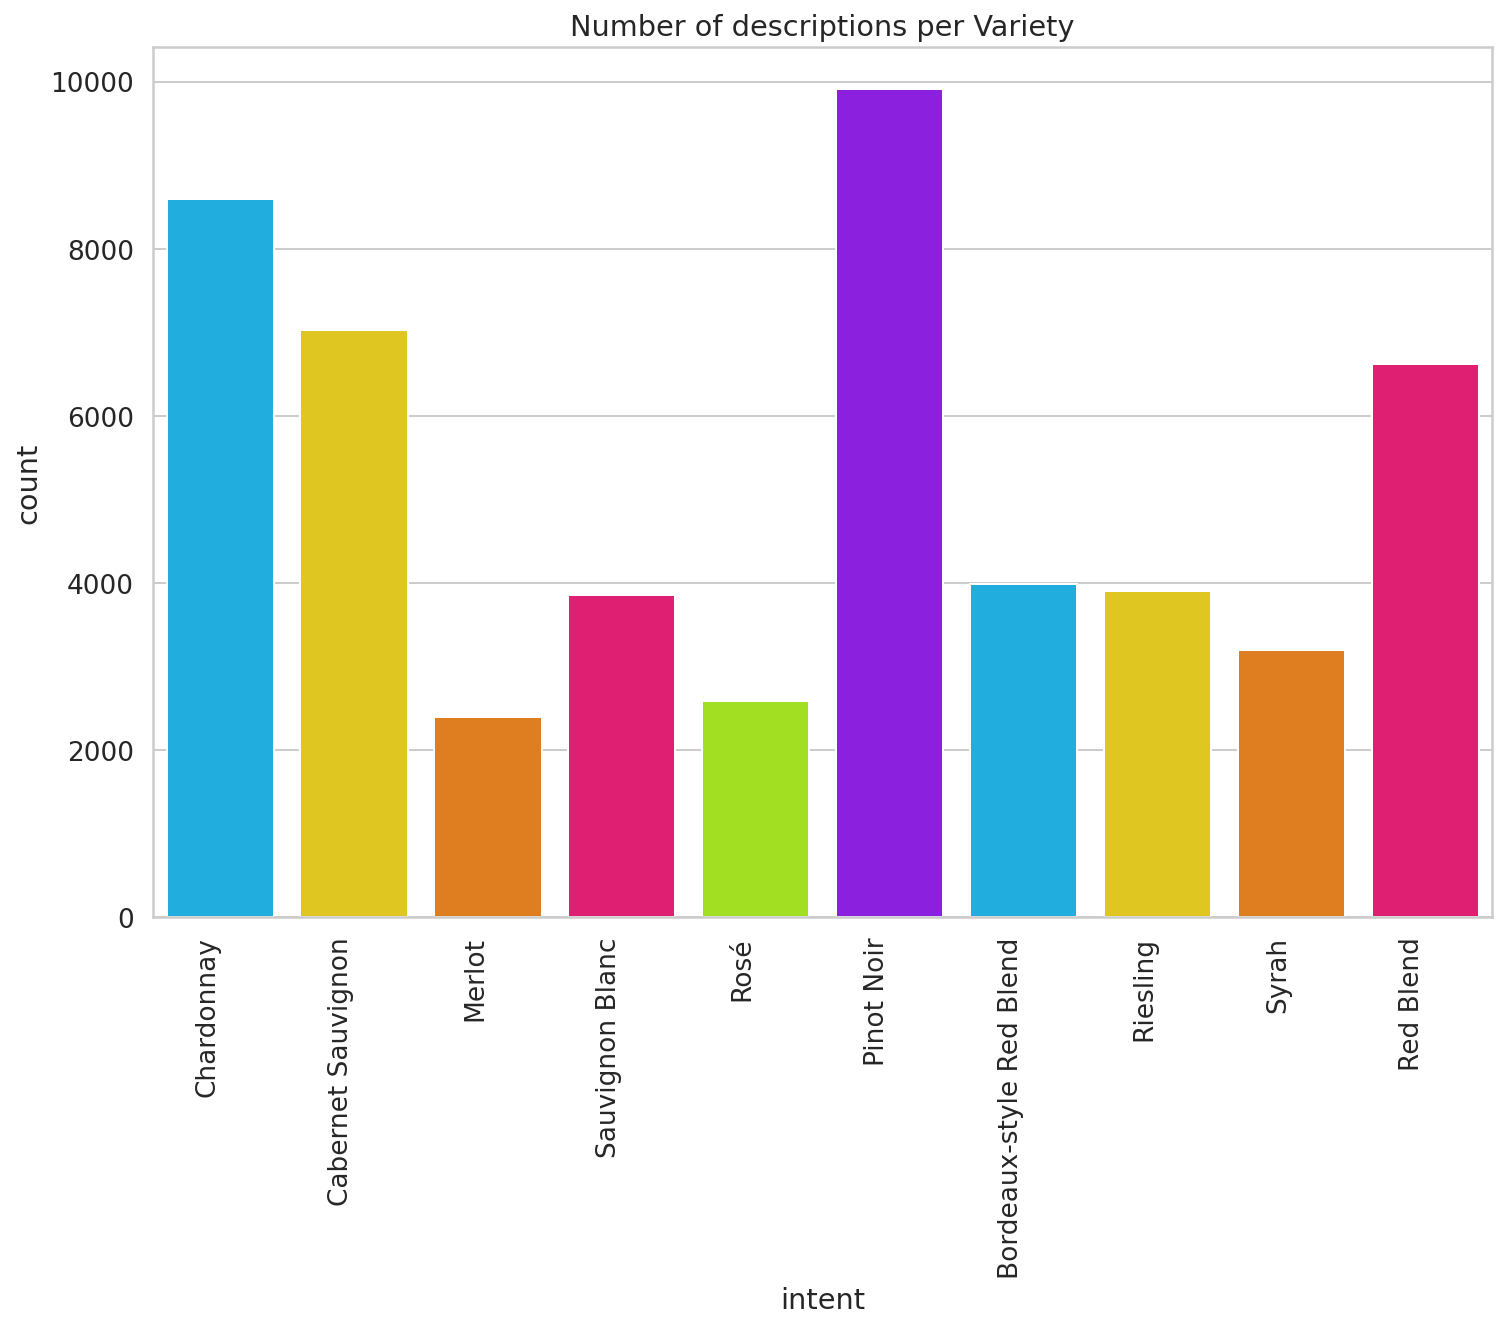

In [48]:
chart = sns.countplot(train_df.intent, palette=HAPPY_COLORS_PALETTE)
plt.title("Number of descriptions per Variety")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right');

In [49]:
#Check lowest value
train_df['intent'].value_counts()

Pinot Noir                  9912
Chardonnay                  8591
Cabernet Sauvignon          7026
Red Blend                   6624
Bordeaux-style Red Blend    3982
Riesling                    3908
Sauvignon Blanc             3850
Syrah                       3197
Rosé                        2585
Merlot                      2396
Name: intent, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


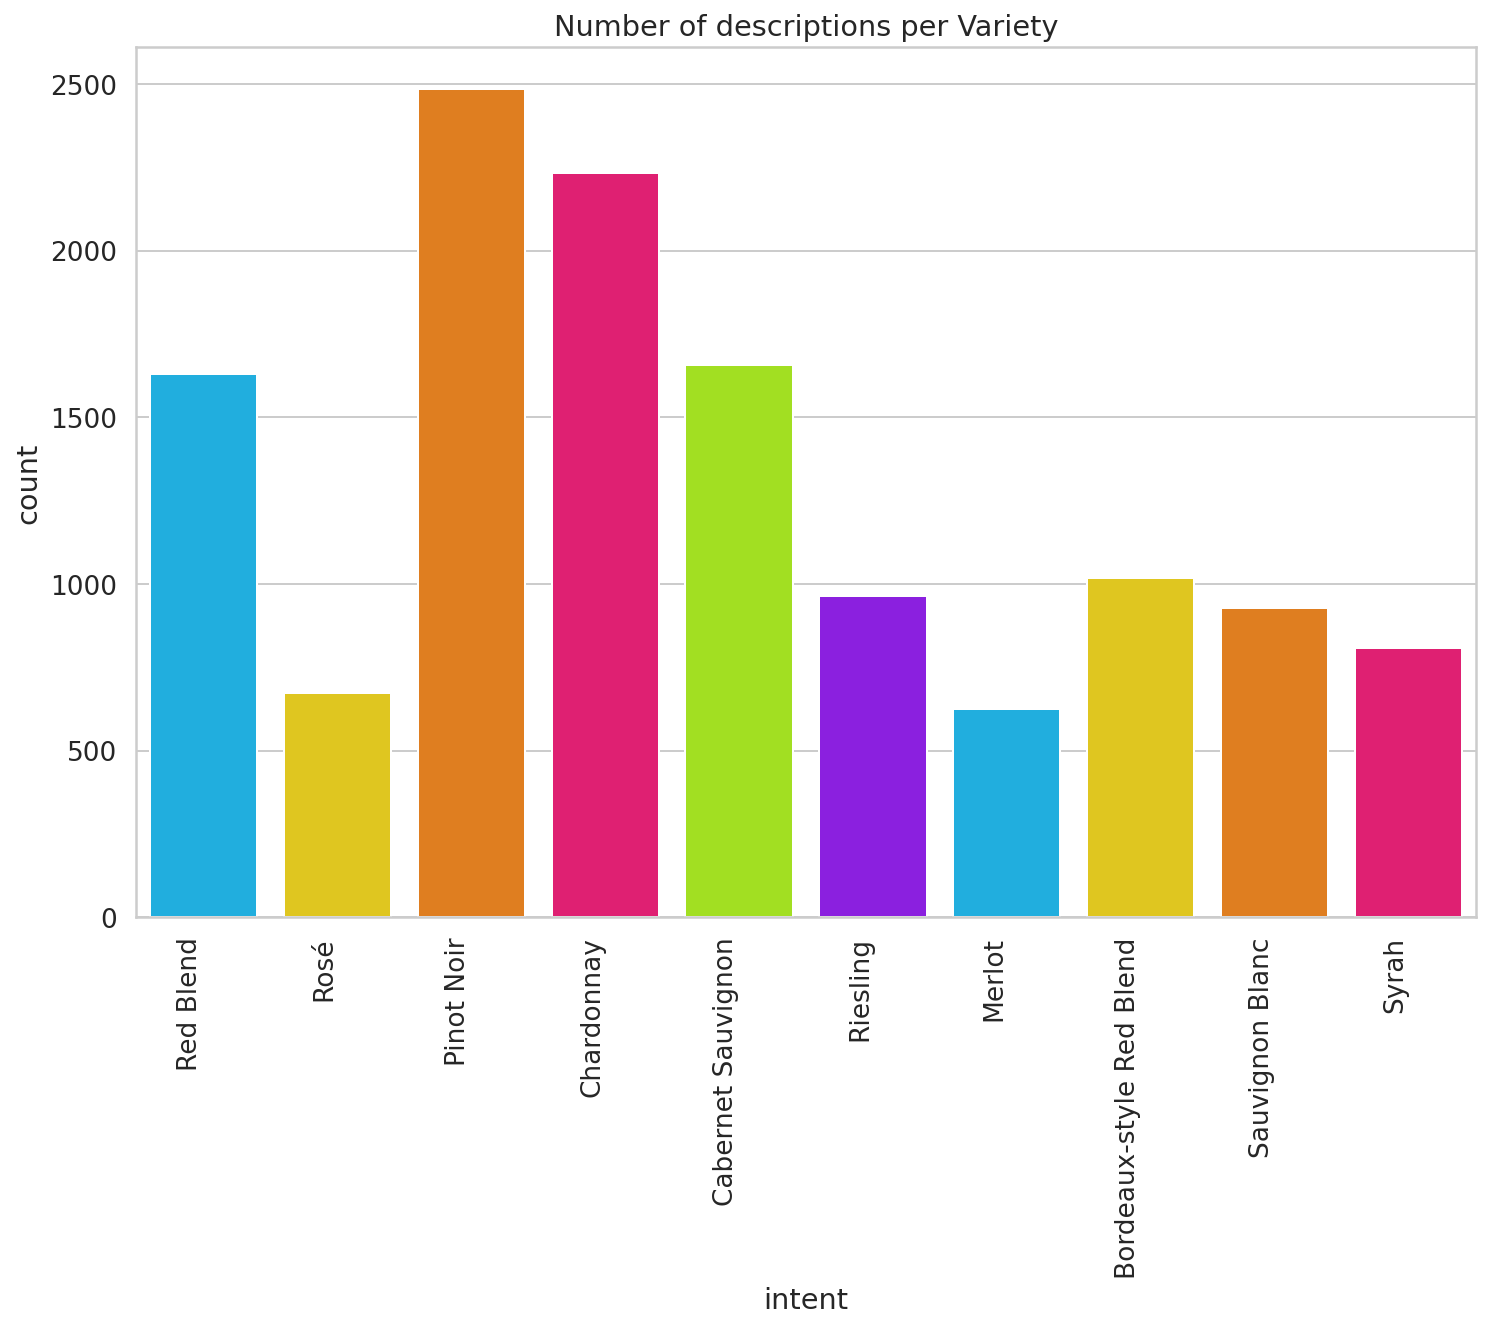

In [50]:
chart = sns.countplot(test_df.intent, palette=HAPPY_COLORS_PALETTE)
plt.title("Number of descriptions per Variety")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right');

## **MAKING THE TRAINING DATASET UNIFORM:**

In [51]:
# Now to make the training dataset uniform, I have taken the wine with least number of count (i.e. Sauvignin Blanc)
merlot_df = train_df[train_df['intent']=='Merlot']

# For doing so, first I have selected other varities of wines
cabernet_sauvignon_df = train_df[train_df['intent']=='Cabernet Sauvignon']
riesling_df = train_df[train_df['intent']=='Riesling']
pinot_noir_df = train_df[train_df['intent']=='Pinot Noir']
chardonnay_df = train_df[train_df['intent']=='Chardonnay']
red_blend_df = train_df[train_df['intent']=='Red Blend']
rose_df = train_df[train_df['intent']== 'Rosé']
bordeaux_style_red_blend_df = train_df[train_df['intent']=='Bordeaux-style Red Blend']
syrah_df = train_df[train_df['intent']== 'Syrah']
sauvignon_blanc_df = train_df[train_df['intent']=='Sauvignon Blanc']

In [52]:
# Now we even the count to the lowest wine variety = Merlot 2437
cabernet_sauvignon_df = cabernet_sauvignon_df.sample(n=len(merlot_df), random_state=RANDOM_SEED)
riesling_df = riesling_df.sample(n=len(merlot_df), random_state=RANDOM_SEED)
pinot_noir_df = pinot_noir_df.sample(n=len(merlot_df), random_state=RANDOM_SEED)
chardonnay_df = chardonnay_df.sample(n=len(merlot_df), random_state=RANDOM_SEED)
red_blend_df = red_blend_df.sample(n=len(merlot_df), random_state=RANDOM_SEED)
rose_df = rose_df.sample(n=len(merlot_df), random_state=RANDOM_SEED)
bordeaux_style_red_blend_df = bordeaux_style_red_blend_df.sample(n=len(merlot_df), random_state=RANDOM_SEED)
syrah_df = syrah_df.sample(n=len(merlot_df), random_state=RANDOM_SEED)
sauvignon_blanc_df = sauvignon_blanc_df.sample(n=len(merlot_df), random_state=RANDOM_SEED)

In [53]:
# Now I am adding all the data together
merlot_df = merlot_df.append(cabernet_sauvignon_df).reset_index(drop=True)
merlot_df = merlot_df.append(riesling_df).reset_index(drop=True)
merlot_df = merlot_df.append(pinot_noir_df).reset_index(drop=True)
merlot_df = merlot_df.append(chardonnay_df).reset_index(drop=True)
merlot_df = merlot_df.append(red_blend_df).reset_index(drop=True)
merlot_df = merlot_df.append(rose_df).reset_index(drop=True)
merlot_df = merlot_df.append(bordeaux_style_red_blend_df).reset_index(drop=True)
merlot_df = merlot_df.append(syrah_df).reset_index(drop=True)
merlot_df = merlot_df.append(sauvignon_blanc_df).reset_index(drop=True)

train_df = merlot_df
train_df.shape

(23960, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


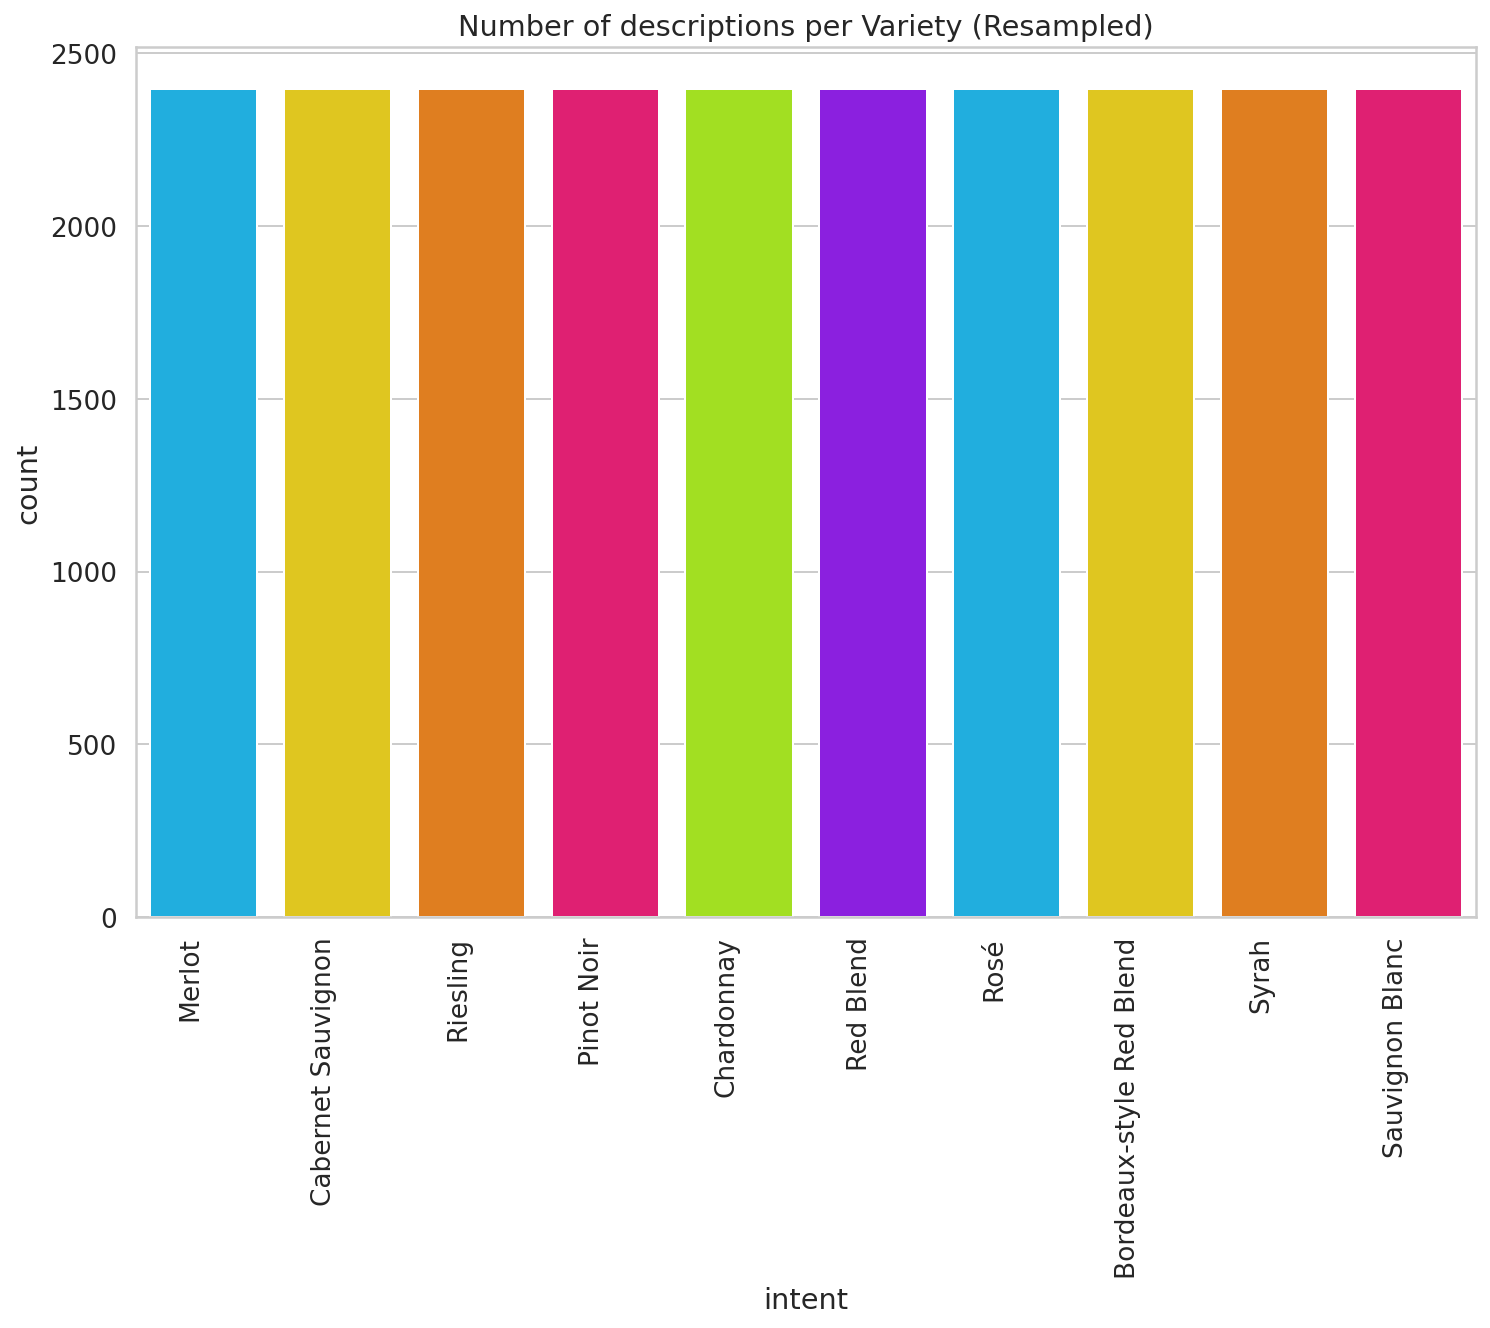

In [54]:
chart = sns.countplot(train_df.intent, palette=HAPPY_COLORS_PALETTE)
plt.title("Number of descriptions per Variety (Resampled)")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right');

In [55]:
# Here I am shuffling the data
train_df = train_df.sample(frac=1).reset_index(drop=True)

# preprocess_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'
# encoder_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'


In [56]:
!wget https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip

--2022-07-07 12:01:22--  https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 142.250.99.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 407727028 (389M) [application/zip]
Saving to: ‘uncased_L-12_H-768_A-12.zip’

uncased_L-12_H-768_ 100%[===================>] 388.84M   320MB/s    in 1.2s    

2022-07-07 12:01:23 (320 MB/s) - ‘uncased_L-12_H-768_A-12.zip’ saved [407727028/407727028]



In [57]:
# !tar -xzvf /content/bert_en_uncased_L-12_H-768_A-12_4.tar.gz

!unzip /content/uncased_L-12_H-768_A-12.zip

Archive:  /content/uncased_L-12_H-768_A-12.zip
   creating: uncased_L-12_H-768_A-12/
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.meta  
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.data-00000-of-00001  
  inflating: uncased_L-12_H-768_A-12/vocab.txt  
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.index  
  inflating: uncased_L-12_H-768_A-12/bert_config.json  


In [58]:
os.makedirs("model", exist_ok=True)

!mv uncased_L-12_H-768_A-12/ model

mv: cannot move 'uncased_L-12_H-768_A-12/' to 'model/uncased_L-12_H-768_A-12': Directory not empty


In [59]:
bert_model_name="uncased_L-12_H-768_A-12"

bert_ckpt_dir = os.path.join("model/", bert_model_name)
bert_ckpt_file = os.path.join(bert_ckpt_dir, "bert_model.ckpt")
bert_config_file = os.path.join(bert_ckpt_dir, "bert_config.json")

##**FINAL PREPROCESSING**

In [60]:
class IntentDetectionData:
  DATA_COLUMN = "text"
  LABEL_COLUMN = "intent"

  def __init__(self, train, test, tokenizer: FullTokenizer, classes, max_seq_len=192):
    self.tokenizer = tokenizer
    self.max_seq_len = 0
    self.classes = classes
    
    ((self.train_x, self.train_y), (self.test_x, self.test_y)) = map(self._prepare, [train, test])

    # print("max seq_len", self.max_seq_len)
    self.max_seq_len = min(self.max_seq_len, max_seq_len)
    self.train_x, self.test_x = map(self._pad, [self.train_x, self.test_x])

  def _prepare(self, df):
    x, y = [], []
    
    for _, row in tqdm(df.iterrows()):
      text, label = row[IntentDetectionData.DATA_COLUMN], row[IntentDetectionData.LABEL_COLUMN]

      tokens = self.tokenizer.tokenize(text)
      tokens = ["[CLS]"] + tokens + ["[SEP]"]

      token_ids = self.tokenizer.convert_tokens_to_ids(tokens)

      self.max_seq_len = max(self.max_seq_len, len(token_ids))

      x.append(token_ids)
      y.append(self.classes.index(label))

    return np.array(x), np.array(y)

  def _pad(self, ids):
    x = []

    for input_ids in ids:
      input_ids = input_ids[:min(len(input_ids), self.max_seq_len - 2)]
      input_ids = input_ids + [0] * (self.max_seq_len - len(input_ids))
      x.append(np.array(input_ids))

    return np.array(x)

In [61]:
tokenizer = FullTokenizer(vocab_file=os.path.join(bert_ckpt_dir, "vocab.txt"))

tokenizer.tokenize("I like french classic wine")

['i', 'like', 'french', 'classic', 'wine']

In [62]:
tokens = tokenizer.tokenize("I can't wait to visit Bulgaria again!")
tokenizer.convert_tokens_to_ids(tokens)

[1045, 2064, 1005, 1056, 3524, 2000, 3942, 8063, 2153, 999]

In [63]:
#Fine tuning
def create_model(max_seq_len, bert_config_file, bert_ckpt_file):

  with tf.io.gfile.GFile(bert_config_file, "r") as reader:
      bc = StockBertConfig.from_json_string(reader.read())
      bert_params = map_stock_config_to_params(bc)
      bert_params.adapter_size = None
      bert = BertModelLayer.from_params(bert_params, name="bert")
        
  input_ids = keras.layers.Input(shape=(max_seq_len, ), dtype='int32', name="input_ids")
  bert_output = bert(input_ids)

  print("bert shape", bert_output.shape)

  cls_out = keras.layers.Lambda(lambda seq: seq[:, 0, :])(bert_output)
  cls_out = keras.layers.Dropout(0.5)(cls_out)
  logits = keras.layers.Dense(units=768, activation="tanh")(cls_out)
  logits = keras.layers.Dropout(0.5)(logits)
  logits = keras.layers.Dense(units=len(classes), activation="softmax")(logits)

  model = keras.Model(inputs=input_ids, outputs=logits)
  model.build(input_shape=(None, max_seq_len))

  load_stock_weights(bert, bert_ckpt_file)
        
  return model

In [64]:
test_df.head()

text              intent
83921  Soft and melted in fruit, with high alcohol th...           Red Blend
45970  This pale rosé is very expressive of its terro...                Rosé
72634  The aromas are bright, with notes of stems, ra...          Pinot Noir
99581  Like all Thomas Fogarty's Chardonnays, this is...          Chardonnay
85498  Shows the richness and balance of Stag's Leap ...  Cabernet Sauvignon

In [65]:
classes = train_df.intent.unique().tolist()
data = IntentDetectionData(
  train_df,
  test_df,
  tokenizer,
  classes,
  max_seq_len=128
)

23960it [00:24, 969.94it/s] 
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
13018it [00:13, 969.92it/s] 


In [66]:
data.train_x.shape

(23960, 128)

In [67]:
data.train_x[0]

array([  101,  2023, 12586,  1010,  2007,  2753,  1003,  2778, 13340,
       10718,  1010,  2003, 12090,  2135, 15594,  2096,  2036, 22503,
        1012,  2009,  2038,  1037,  5238,  9092,  8713, 14902,  2008,
        3957,  2009,  1037, 27838, 21756,  2839,  1012,  1996,  2044,
       10230,  2618,  2003,  4408,  1998,  5909,  2100,  1012,   102,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0]

In [68]:
data.train_y[0]

0

In [69]:
data.max_seq_len

128

In [70]:
#USE GPU NOT TPU!!!
model = create_model(data.max_seq_len, bert_config_file, bert_ckpt_file)

bert shape (None, 128, 768)
Done loading 196 BERT weights from: model/uncased_L-12_H-768_A-12/bert_model.ckpt into <bert.model.BertModelLayer object at 0x7f2d5a019390> (prefix:bert). Count of weights not found in the checkpoint was: [0]. Count of weights with mismatched shape: [0]
Unused weights from checkpoint: 
	bert/embeddings/token_type_embeddings
	bert/pooler/dense/bias
	bert/pooler/dense/kernel
	cls/predictions/output_bias
	cls/predictions/transform/LayerNorm/beta
	cls/predictions/transform/LayerNorm/gamma
	cls/predictions/transform/dense/bias
	cls/predictions/transform/dense/kernel
	cls/seq_relationship/output_bias
	cls/seq_relationship/output_weights


In [71]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_ids (InputLayer)       [(None, 128)]             0         
_________________________________________________________________
bert (BertModelLayer)        (None, 128, 768)          108890112 
_________________________________________________________________
lambda (Lambda)              (None, 768)               0         
_________________________________________________________________
dropout (Dropout)            (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 768)               590592    
_________________________________________________________________
dropout_1 (Dropout)          (None, 768)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7690  

##**COMPILING AND TRAINING THE MODEL:**

In [72]:
model.compile(
  optimizer=keras.optimizers.Adam(1e-5),
  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")]
)

In [73]:
log_dir = "log/intent_detection/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%s")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir)

history = model.fit(
  x=data.train_x, 
  y=data.train_y,
  validation_split=0.1,
  batch_size=32,
  shuffle=True,
  epochs=5,
  callbacks=[tensorboard_callback])

Epoch 1/5
674/674 [==============================] - 774s 1s/step - loss: 2.0668 - acc: 0.3911 - val_loss: 1.8143 - val_acc: 0.6440
Epoch 2/5
674/674 [==============================] - 769s 1s/step - loss: 1.7741 - acc: 0.6934 - val_loss: 1.7471 - val_acc: 0.7145
Epoch 3/5
674/674 [==============================] - 765s 1s/step - loss: 1.7181 - acc: 0.7455 - val_loss: 1.7119 - val_acc: 0.7492
Epoch 4/5
674/674 [==============================] - 765s 1s/step - loss: 1.6913 - acc: 0.7715 - val_loss: 1.7062 - val_acc: 0.7554
Epoch 5/5
674/674 [==============================] - 764s 1s/step - loss: 1.6708 - acc: 0.7921 - val_loss: 1.7019 - val_acc: 0.7600


In [74]:
%load_ext tensorboard

In [75]:
%tensorboard --logdir log

<IPython.core.display.Javascript object>

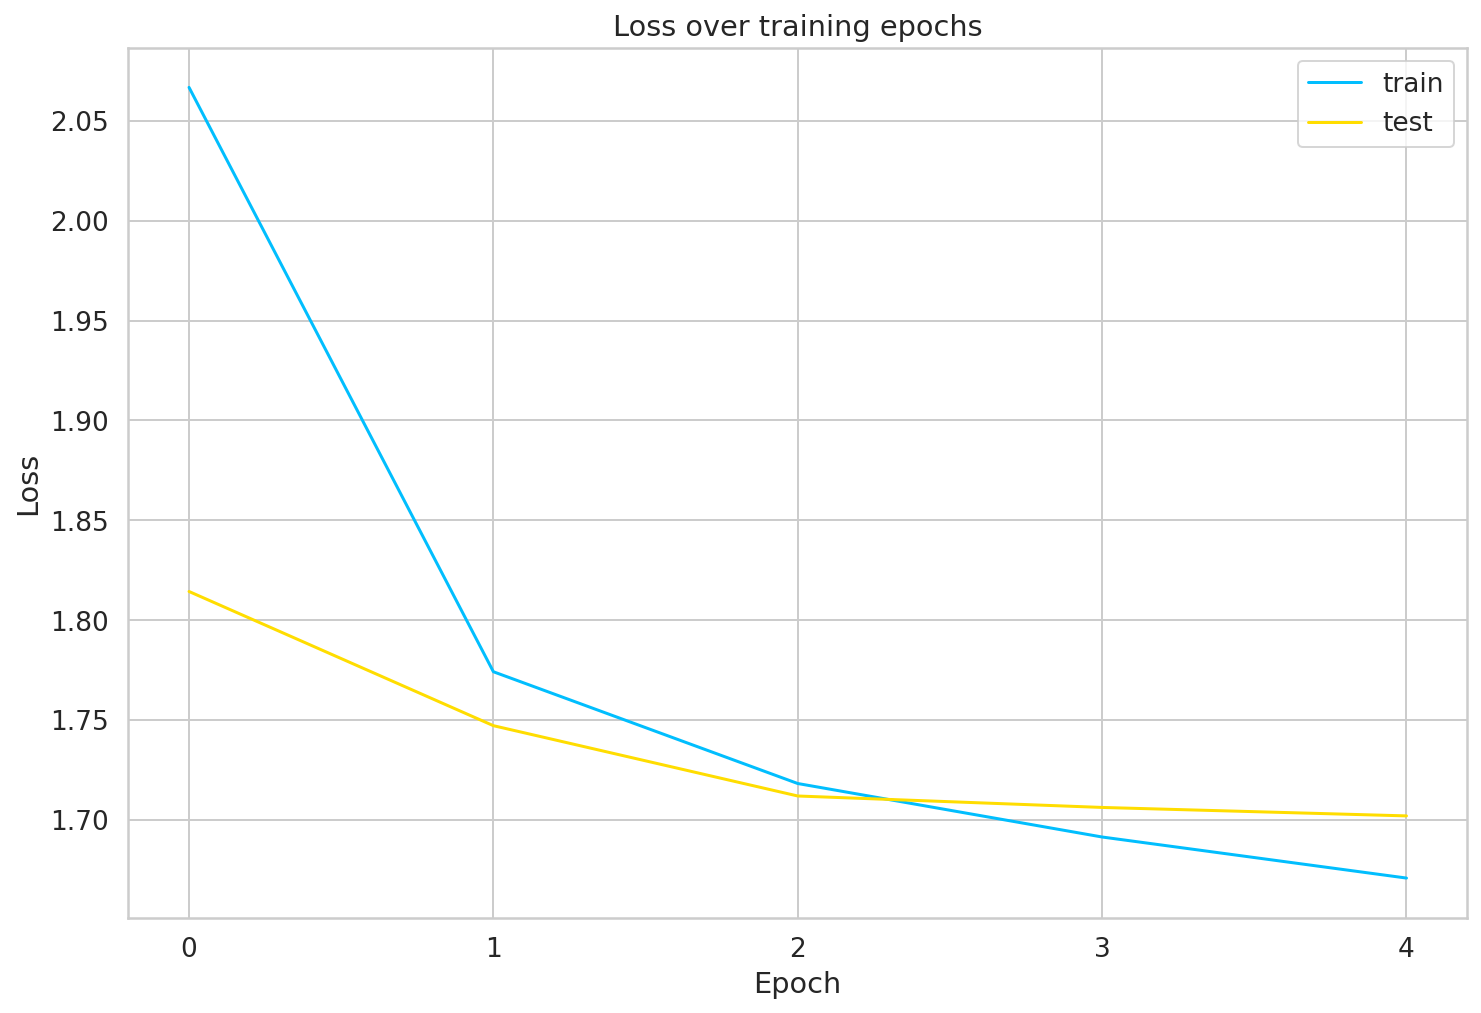

In [76]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.title('Loss over training epochs')
plt.show();

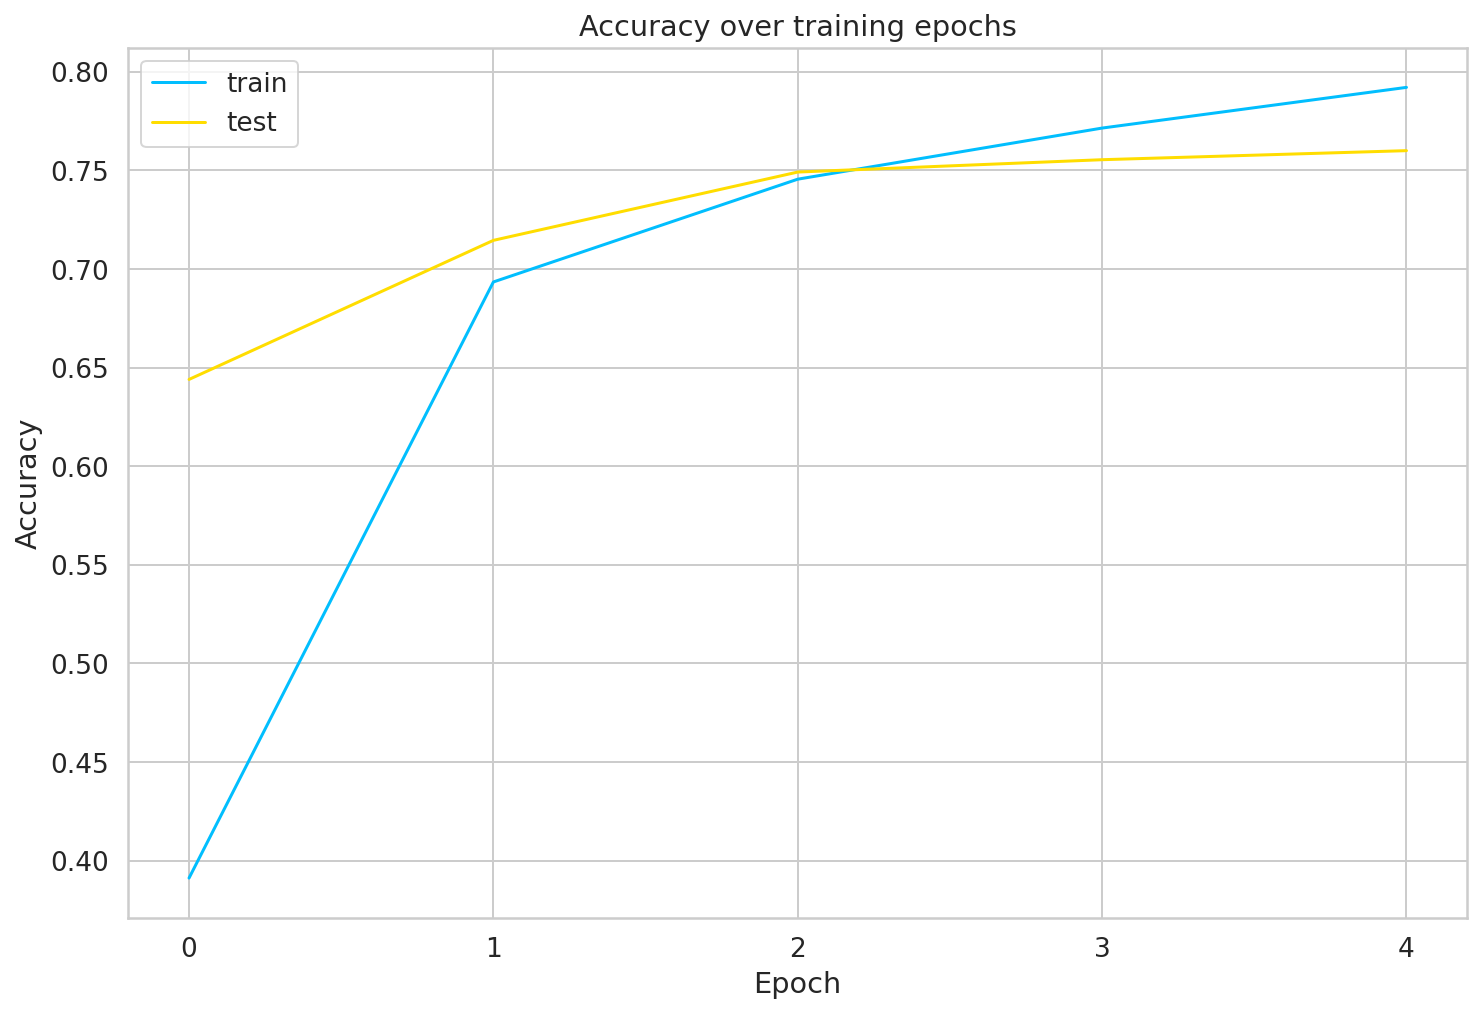

In [77]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.plot(history.history['acc'])
ax.plot(history.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.title('Accuracy over training epochs')
plt.show();

In [78]:
_, train_acc = model.evaluate(data.train_x, data.train_y)
_, test_acc = model.evaluate(data.test_x, data.test_y)

print("train acc", train_acc)
print("test acc", test_acc)

407/407 [==============================] - 129s 316ms/step - loss: 1.6931 - acc: 0.7669
train acc 0.8163188695907593
test acc 0.7668612599372864


In [79]:
y_pred = model.predict(data.test_x).argmax(axis=-1)

In [80]:
print(classification_report(data.test_y, y_pred, target_names=classes))

                          precision    recall  f1-score   support

                    Rosé       0.71      0.90      0.79       674
      Cabernet Sauvignon       0.80      0.57      0.67      1657
Bordeaux-style Red Blend       0.72      0.82      0.77      1017
                Riesling       0.80      0.91      0.85       965
              Chardonnay       0.89      0.88      0.88      2232
                  Merlot       0.39      0.59      0.47       624
               Red Blend       0.84      0.76      0.80      1629
              Pinot Noir       0.86      0.77      0.81      2485
         Sauvignon Blanc       0.86      0.69      0.77       928
                   Syrah       0.54      0.75      0.63       807

                accuracy                           0.77     13018
               macro avg       0.74      0.76      0.74     13018
            weighted avg       0.79      0.77      0.77     13018



## **CONFUSION MATRIX**

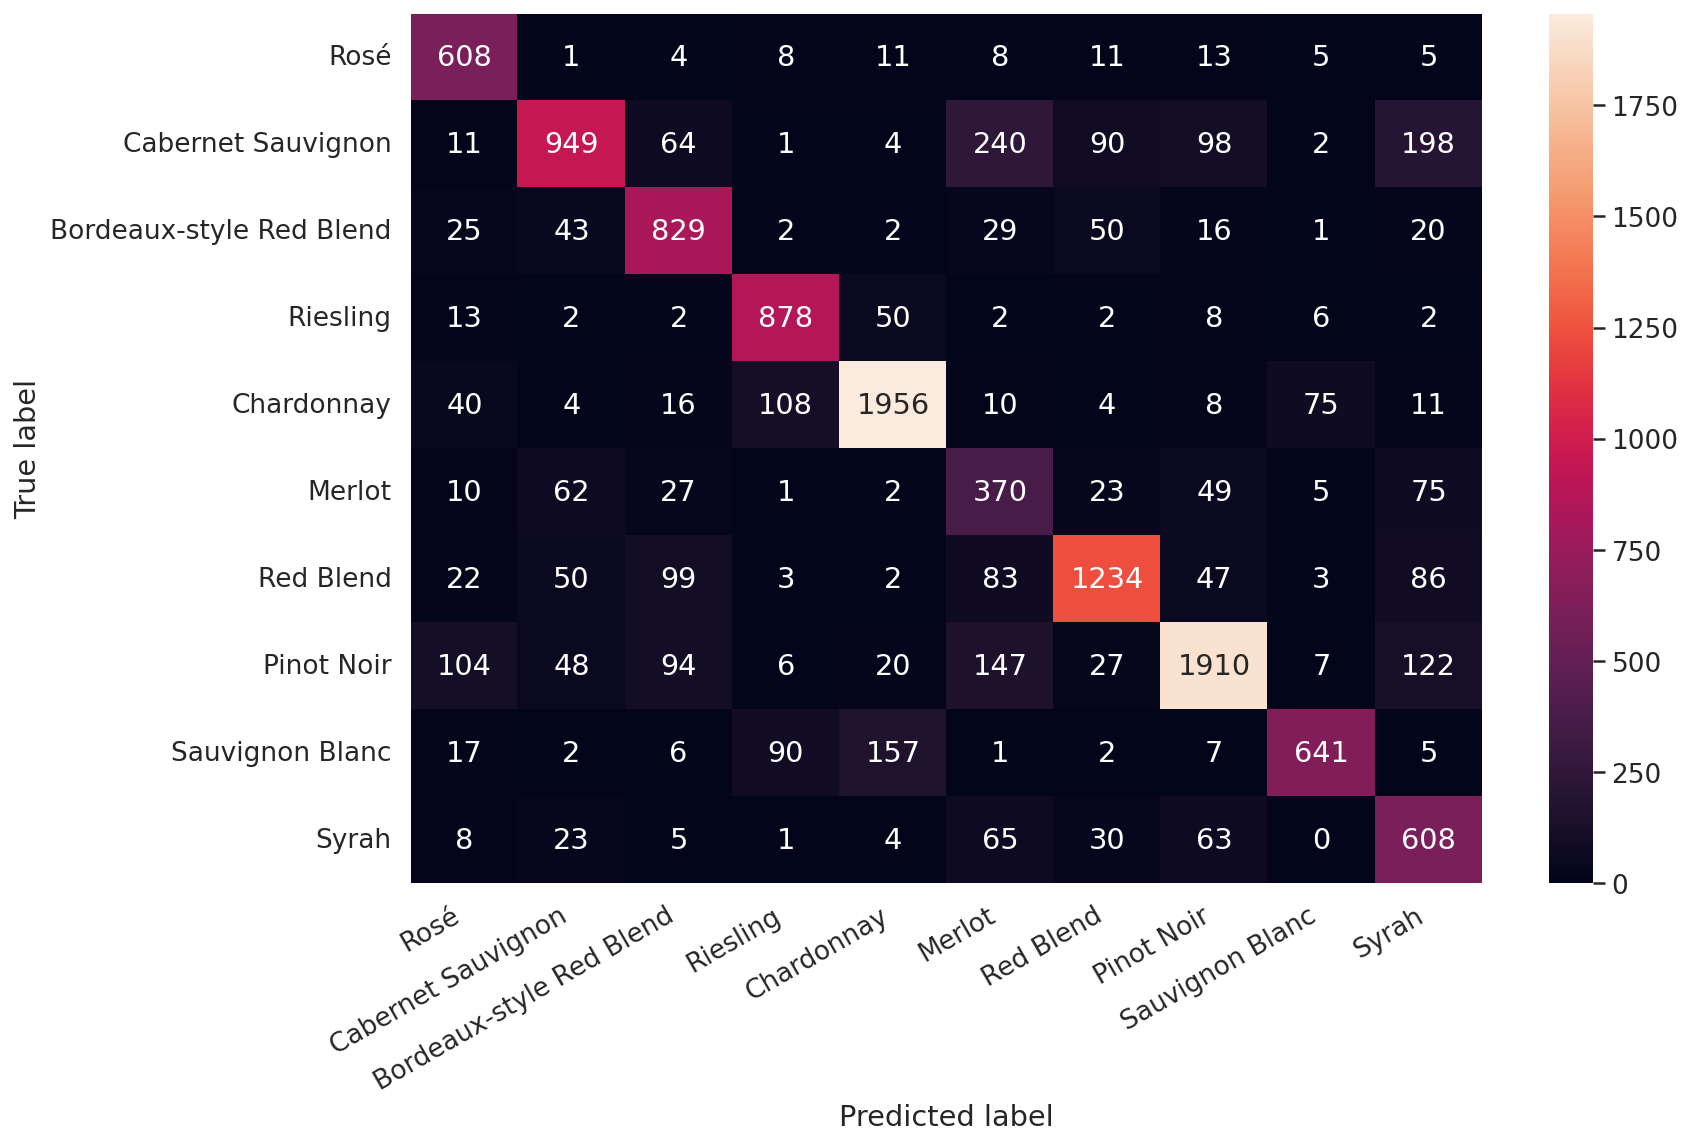

In [82]:
cm = confusion_matrix(data.test_y, y_pred)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)

hmap = sns.heatmap(df_cm, annot=True, fmt="d")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [83]:
sentences = [
  "Just right for a Friday evening",
  "Hint of cherry, acidic, citrus aromas",
  "Apples, sweet embrace of the pallate"
]

pred_tokens = map(tokenizer.tokenize, sentences)
pred_tokens = map(lambda tok: ["[CLS]"] + tok + ["[SEP]"], pred_tokens)
pred_token_ids = list(map(tokenizer.convert_tokens_to_ids, pred_tokens))

pred_token_ids = map(lambda tids: tids +[0]*(data.max_seq_len-len(tids)),pred_token_ids)
pred_token_ids = np.array(list(pred_token_ids))

predictions = model.predict(pred_token_ids).argmax(axis=-1)

for text, label in zip(sentences, predictions):
    print("text:", text, "\nintent:", classes[label])
    print()

text: Just right for a Friday evening 
intent: Sauvignon Blanc

text: Hint of cherry, acidic, citrus aromas 
intent: Merlot

text: Apples, sweet embrace of the pallate 
intent: Chardonnay

